## Q3) Outlier Detection
Outlier detection (also known as '*anomaly detection*') is the process of finding observation points that are very distant from other observations. Such observation points are called outliers or anomalies. In this question,  you will employ simple visualization and statistical techniques to find the outliers and then, you will apply  outlier detection algorithms. 

You will be using the same **"customer_segemntation"** dataset that was used in the Q1. 


In [0]:
import seaborn as sns
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore, norm
from sklearn.preprocessing import MinMaxScaler


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#loading the dataset
cust_df = pd.read_csv("/content/drive/My Drive/customer_segmentation.csv")
cust_df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [0]:
cust = cust_df.copy()
cust = cust.dropna()
# print(cust.columns)

### **Box-Plots**

Plot box-plots for "**Income**" and "**Card Debt**" attributes and comment on the results. 

# Income Boxplot

Text(0.5, 1.0, 'Boxplot For Income')

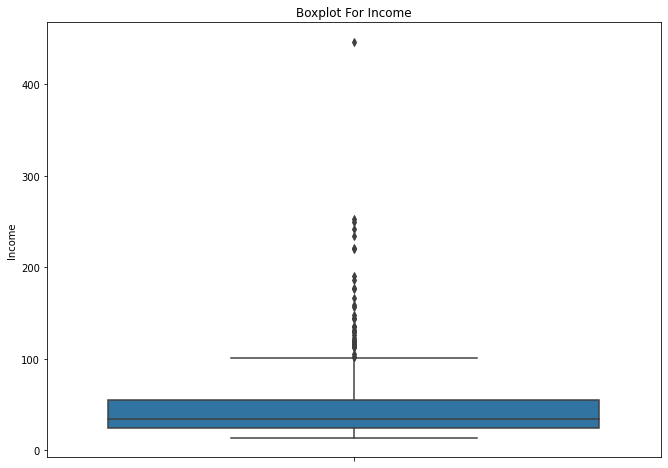

In [0]:
#Write code here
plt.figure(figsize=(11,8))
b_plot = sns.boxplot(y=cust["Income"])
plt.title("Boxplot For Income")

# Interpretation
The boxplot shows that the median income level is around 32-33k. The first quartile is at around 28 whereas the third quartile is around 50k. There are quite a few outliers owing to people having quite high income levels relative to the median income. All the outliers are people who have very high incomes. 


# Card Debt BoxPlot

Text(0.5, 1.0, 'Boxplot For Card Debt')

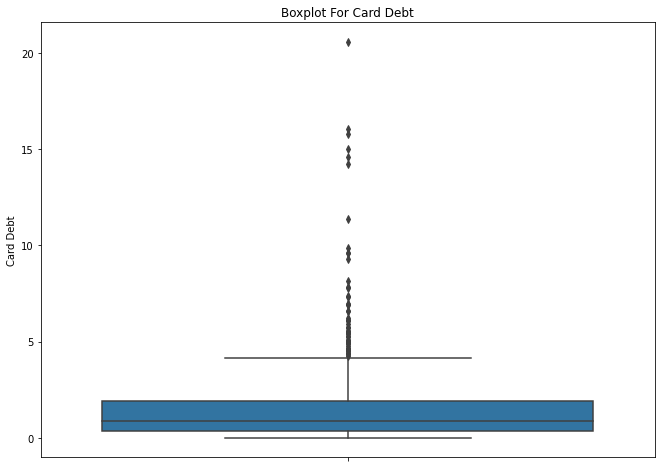

In [0]:
#Write code here
plt.figure(figsize=(11,8))
b_plot = sns.boxplot(y=cust["Card Debt"])
plt.title("Boxplot For Card Debt")

# Interpretation

The boxplot shows that the median Card Debt is around 1.2. The first quartile is at around 0.7 whereas the third quartile is at around 2. The outliers are again all concentrated in the region above the third quartile owing to some people having very high card debts relative to the people in the data set.

### **Scatter-plot**

Plot scatter-plot for **Income Vs DebtIncomeRatio**. Comment if it shows any outliers. Use matplotlib.pyplot library for scatter-plot.

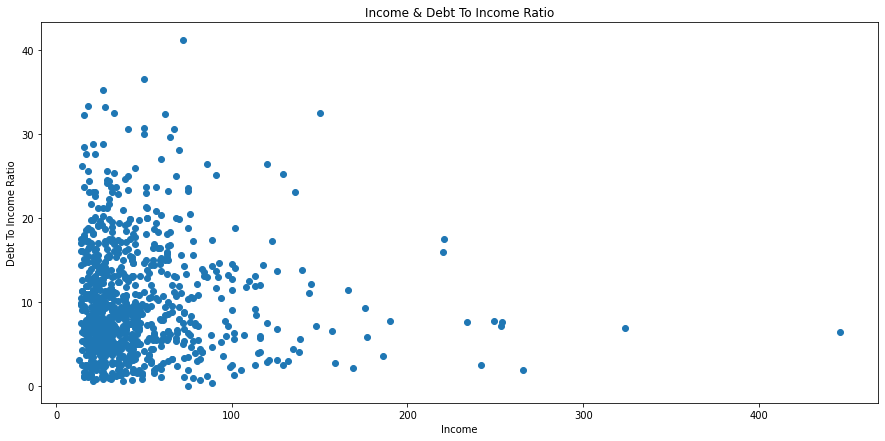

In [0]:
#Write code here

#Write code here
plt.figure(figsize=(15,7))
plt.scatter(cust_df["Income"],cust_df["DebtIncomeRatio"])
plt.xlabel("Income")
plt.ylabel("Debt To Income Ratio")
plt.title("Income & Debt To Income Ratio")

plt.show()

# Interpretation

We can see that while most of the people have incomes below 130 and  a major portion of them have a debt to income ratio below 20. However, we can see that there are some significant outliers such as people hacving incomes higher than 450 and people with a debt to income ratio higher than 40 


### **Z_score**

Z-score tells how many standard deviations is a certain data point away from the mean. For **Age,Other_Debt and DebtIncomeRatio**, output the list of values that are identified as outliers on the basis of their z-scores.

In [0]:

# Doing everything in one loop
cols = ["DebtIncomeRatio","Age","Other Debt"]
all_outliers =[]

for i in cols:
    all_z_scores =zscore(cust[i])
    outliers=[]

    for ind, d_p in enumerate(cust[i]):
      z_sc = all_z_scores[ind]
      
      abs_score = (abs(z_sc))
      if(abs_score >= 2.5):
        outliers.append(d_p)
    all_outliers.append(outliers)


In [0]:
# Outliers for Debt to Income Ratio
all_outliers[0]

[32.5,
 29.7,
 30.1,
 28.9,
 28.5,
 30.7,
 27.7,
 28.9,
 41.3,
 30.6,
 35.3,
 33.3,
 36.6,
 27.7,
 30.8,
 33.4]

In [0]:
# Outliers for Age
all_outliers[1]

[55, 55, 56]

In [0]:
# Outliers for Other Debt
all_outliers[2]

[18.257,
 14.453,
 15.405,
 11.874,
 12.075999999999999,
 23.104,
 11.894,
 20.616,
 11.724,
 17.185,
 13.050999999999998,
 12.659,
 15.149000000000001,
 17.799,
 18.269000000000002,
 12.714,
 14.719000000000001,
 17.204,
 12.959000000000001,
 16.668,
 27.034000000000002,
 11.663,
 12.422]

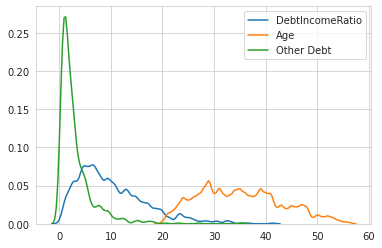

In [0]:
# Plotting distribution so we can analyze Z-score validity
for i in range(len(cols)):

  sns.set_style('whitegrid')
  sns.kdeplot(cust_df[cols[i]], bw=0.5)
  


* **What z-score threshold did you use to detect the outliers and why?**

* A Threshold of 2.5, 2.5 was used. Outliers are extreme values in the data set and this value makes sure that only extreme values are categorized as outliers. Essentially, a threshold of 2.5/-2.5 ensures that points which are 2.5 standard deviations away from the mean of the data set are considered as outliers. If the data is normally distributed, then 2.5/-2.5 is a good measure because it ensures that more than 95% values were contained within 2.5 std. deviations and the rest were . Since the above plot shows that only age seems to be 'kind of' normal, the above mentioned point doesn't really hold for our data

### ***IQR***

For **Age,Other_Debt and DebtIncomeRatio**, output the list of values that are identified as outliers on the basis of their IQR values.

For this, calculate the first (q1) and third quartile (q3). An outlier is then a data point  that lies outside the interquartile range. That is:
*   *Lower outlier= Q1 - (k x IQR)*
*   *Higher outlier= Q3 + (k x IQR)*

Choose an appropriate 'k' for this part.

In [0]:
#Write code here

data = []
K=1.5
  
# Again, doing everything in one go
for i in cols:
  quarts = np.percentile(cust[i], [75, 50, 25])
  
  I_Q_R = quarts[0]-quarts[2]
  
  low_out = quarts[2] - (np.multiply(K,I_Q_R))
  high_out = quarts[0]+ np.multiply(K,I_Q_R)
  data.append([I_Q_R,low_out,high_out])

In [0]:
feature_header =['Inter_Quartile_Range','Upper Bound','Lower Bound']

summary =pd.DataFrame(data,columns=feature_header,index=cols)
summary

,Inter_Quartile_Range,Upper Bound,Lower Bound
DebtIncomeRatio,9.12500,-8.687500,27.812500
Age,11.00000,12.500000,56.500000
Other Debt,2.87925,-3.274875,8.242125


In [0]:
# Plotting the outliers

In [0]:
data

[[9.125, -8.6875, 27.8125],
 [11.0, 12.5, 56.5],
 [2.8792500000000003, -3.274875, 8.242125000000001]]

In [0]:
all_outliers =[]
for ind, d_p in enumerate(cols):
  outs = cust[(cust[d_p] > summary.loc[d_p,'Lower Bound'])  | (cust[d_p]  < summary.loc[d_p,'Upper Bound'])  ][d_p]
  all_outliers.append(outs)

In [0]:
# Outliers for Debt To Income Ratio

all_outliers[0]

51     32.5
81     29.7
105    30.1
175    28.9
374    28.5
393    30.7
479    28.9
497    41.3
568    30.6
585    35.3
594    33.3
657    36.6
826    30.8
847    33.4
Name: DebtIncomeRatio, dtype: float64

In [0]:
# Outliers for Age

all_outliers[1]

Series([], Name: Age, dtype: int64)

In [0]:
# Outliers for Other Debt

all_outliers[2]

4       8.908
24     18.257
41     10.184
43      9.555
51      9.459
54     10.754
78     14.453
81     15.405
105    11.874
144     9.251
183    12.076
198    23.104
226     8.600
238     9.044
264     9.737
299    11.894
320    20.616
331    11.724
344    11.042
350    17.185
356    13.051
384    12.659
393     9.591
418     8.502
443    15.149
450    17.799
454    18.269
470     9.391
491    12.714
497    14.719
513    17.204
532    12.959
550     8.399
568    16.668
571    27.034
591     9.704
603     9.716
605     9.499
642    11.663
652    12.422
657    10.980
672    10.631
696     9.975
712    10.811
760     9.198
784     8.631
826     9.286
830     8.362
Name: Other Debt, dtype: float64

* **What k-value did you use to detect the outliers and why?**
K value of 1.5 was used. It ensures that only larger values are delcared as outliers. Also, the usual value for K in the literature is also 1.5

* **Which parameter (IQR or Z-score) is better outlier detection? Give reason.**

If we have a lot of data and it is normally distributed, both of these outlier detection methods perform well. 
In our case, we can see that the data is not normally distributed. Now, the Z-score method assumes the data is normally distributed whereas the IQR method does not rely on this assumption. The KDE estimate shows that our data is not normally distributed.For this reason, we can say that, in our case, we should rely more on the results of the IQR . Another thing to mention is that if we play around with the hyper-parameters of these algorithms, we can get them to pretty much the same outliers. However, that is no indication of them being the same. Since Z-score explicitly takes into account the distribution, if we have normally distributed data, we should prefer Z-score method.




### **Outlier Detection using LOC (Local Outlier Factor)**

LOF uses density-based outlier detection to identify local outliers. An anomaly score is assigned to each sample which measures the local deviation of density of a this sample with respect to its neighbors. 


**1.** Tranform the features by scaling them to a 
given range(e.g. 0-1):

In [0]:
#Write your code here

all_features =cust[["Age","Edu","Years Employed","Income","Card Debt","Other Debt","Defaulted","DebtIncomeRatio"]]
mini_max =MinMaxScaler()

fitted = mini_max.fit_transform(all_features)
scaled_features = pd.DataFrame(fitted)
scaled_features.columns = ["Age","Edu","Years Employed","Income","Card Debt","Other Debt","Defaulted","DebtIncomeRatio"]
scaled_features

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.583333,0.25,0.193548,0.011574,0.005450,0.038054,0.0,0.144254
1,0.750000,0.00,0.838710,0.199074,0.222395,0.302801,0.0,0.303178
2,0.361111,0.25,0.322581,0.099537,0.296803,0.213280,1.0,0.501222
3,0.250000,0.25,0.129032,0.011574,0.032556,0.017415,0.0,0.144254
4,0.750000,0.00,1.000000,0.553241,0.452382,0.328368,0.0,0.166259
...,...,...,...,...,...,...,...,...
695,0.583333,0.00,0.225806,0.067130,0.033189,0.042686,0.0,0.097800
696,0.222222,0.25,0.225806,0.046296,0.016886,0.073181,0.0,0.161369
697,0.138889,0.75,0.000000,0.009259,0.135773,0.117237,1.0,0.806846
698,0.333333,0.00,0.387097,0.032407,0.005061,0.024085,0.0,0.061125


**2.** Implement LOC algorithm using sklearn. Choose the parameters that will be passed into the function:

In [0]:
#Write your code here   
num_neighbors = 2

selected_features = np.vstack((fitted[:,3],fitted[:,7])).T
LOF = LocalOutlierFactor(n_neighbors=num_neighbors)
y_pred = LOF.fit_predict(selected_features)
neg_outs = LOF.negative_outlier_factor_
mask = neg_outs[np.where(neg_outs < -1.25)]
# Using a cut off
#neg_outs=np.where(neg_outs>1.25,0.1,0)
len(mask)


159

Run LOC algorithm multiple times with different values for the '**n_neighbors** 'paramater. 

In [0]:
num_neighbors = [2,5,7,10,11,12,15,20,25,30,40]
selected_features = np.vstack((fitted[:,3],fitted[:,7])).T
  
for i in num_neighbors:
  LOF = LocalOutlierFactor(n_neighbors=i)
  y_pred = LOF.fit_predict(selected_features)
  neg_outs = LOF.negative_outlier_factor_
  # Using a cut off
  mask = neg_outs[np.where(neg_outs < -1.25)]
  print('Number of Neighbors: ', i )
  print('Number of outliers: ', len(mask),'\n\n')

Number of Neighbors:  2
Number of outliers:  159 


Number of Neighbors:  5
Number of outliers:  66 


Number of Neighbors:  7
Number of outliers:  50 


Number of Neighbors:  10
Number of outliers:  47 


Number of Neighbors:  11
Number of outliers:  44 


Number of Neighbors:  12
Number of outliers:  45 


Number of Neighbors:  15
Number of outliers:  45 


Number of Neighbors:  20
Number of outliers:  55 


Number of Neighbors:  25
Number of outliers:  56 


Number of Neighbors:  30
Number of outliers:  60 


Number of Neighbors:  40
Number of outliers:  70 




* **How did the results of LOC alogrithm vary by changing the value of 'n_neighbors'? What parameter value you ended up choosing and why?**

The number of outliers varied for different number of nearest neighbors. The lowest number was observed when the nearest numbers were kept as 11. Outliers decreased when number of neighbors increased from 2 to 11 whereas they increased after that as the number of neighbors started to increase.





**3.** Visualize the results using this function. You may also implement your own visualization function.

In [0]:
fig = plt.figure(figsize=(15,15))
def plot_model(labels, alg_name):
    ax = fig.add_subplot(3,2,1) 
    color_code = {'anomaly':'red', 'normal':'green'}
    colors = [color_code[x] for x in labels]

    ax.scatter(X.iloc[:,0], X.iloc[:,1], color=colors, marker='.', label='red = anomaly')
    ax.legend(loc="lower right")

    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_color('red')

    ax.set_title(alg_name)

# plot_model(labels, 'LocalOutlierFactor')


<Figure size 1080x1080 with 0 Axes>

Number of Neighbors:  20
55 


700


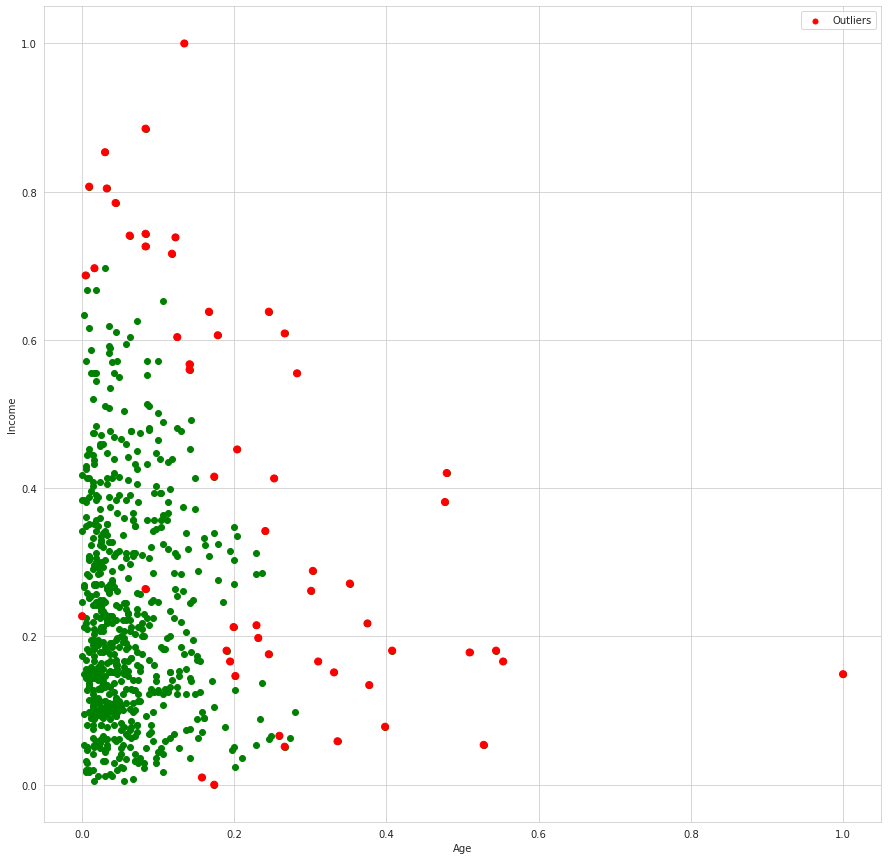

Number of Neighbors:  25
56 


700


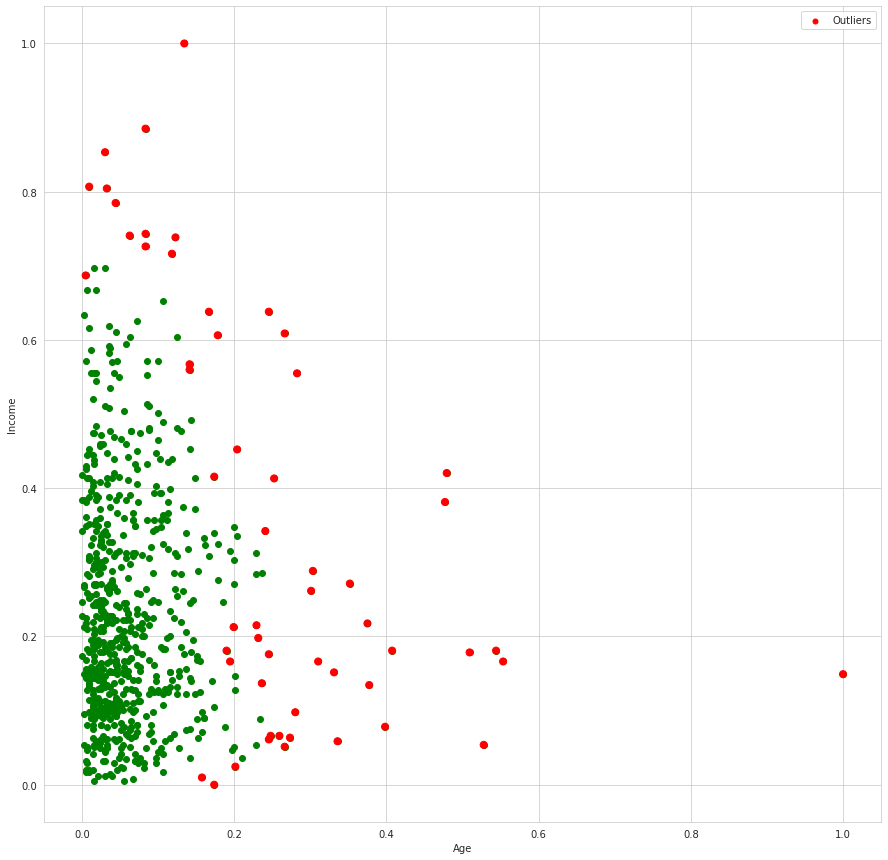

Number of Neighbors:  30
60 


700


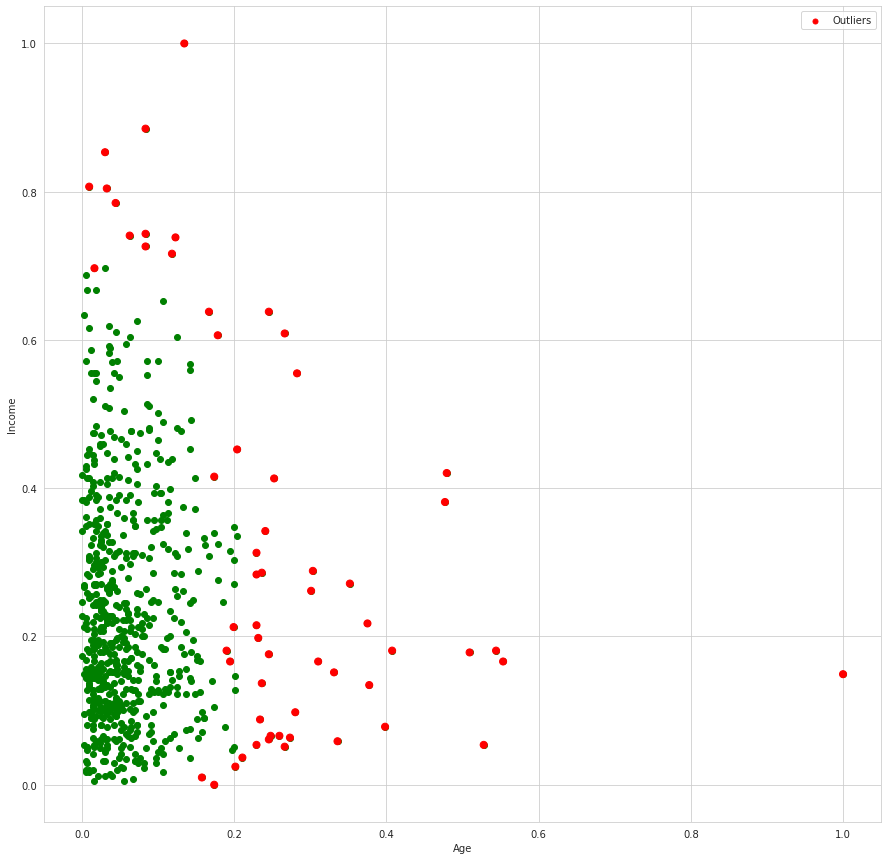

Number of Neighbors:  50
85 


700


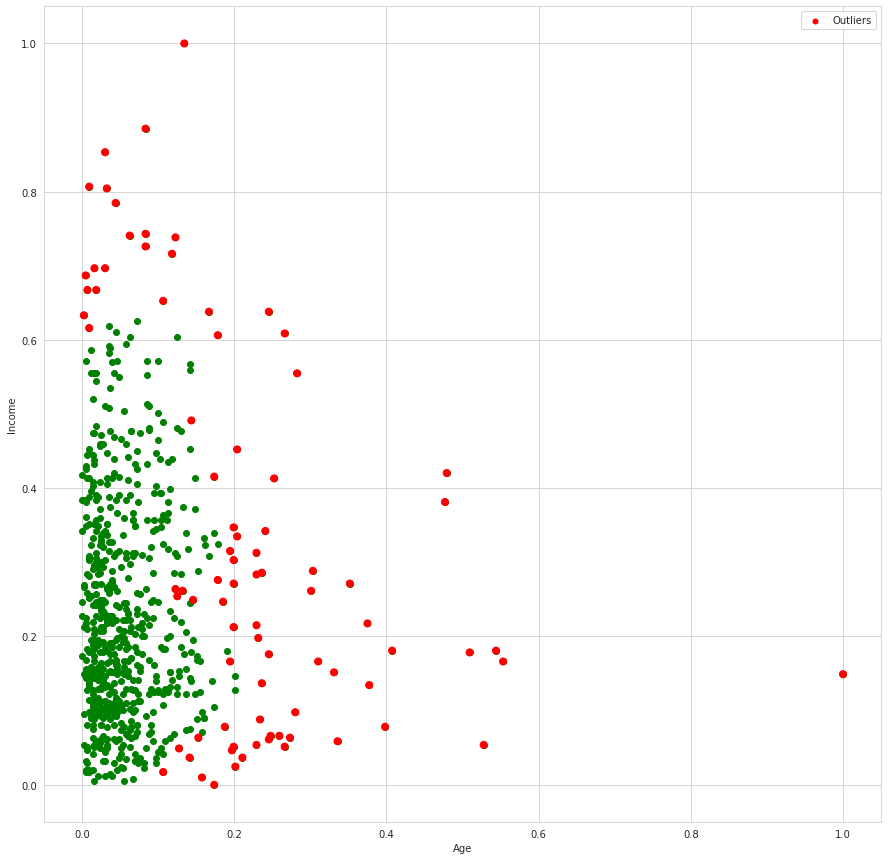

In [0]:
num_neighbors = [20,25,30,50]

for i in num_neighbors:
  fig = plt.figure(figsize=(15,15))
  selected_features = np.vstack((fitted[:,3],fitted[:,7])).T
  LOF = LocalOutlierFactor(n_neighbors=i)
  y_pred = LOF.fit_predict(selected_features)
  neg_outs = LOF.negative_outlier_factor_
  # Using a cut off
  neg_outs=np.where(neg_outs<-1.25,0.1,0)
  print('Number of Neighbors: ', i )
  print(np.count_nonzero(neg_outs),'\n\n')
  print(len(selected_features))
  plt.scatter(selected_features[:, 0], selected_features[:, 1],color='g' )
  plt.scatter(selected_features[:, 0], selected_features[:, 1], s=500 * neg_outs, color='r',label = "Outliers")
  plt.xlabel("Age")
  plt.ylabel("Income")
  plt.legend()  
  plt.axis('tight')
  plt.show()



### **Isolation Forest**

Isolation Forest is an outlier detection algoritm that is based on the Decision Trees. It spearates the outliers by randomly selecting a certain attribute and then randomly selecting a split value between the max and min values of this feature.

**1.** Implement Isolation Forest algorithm using sklearn. Choose the parameters that will be passed into the function:

Number of outliers:  219


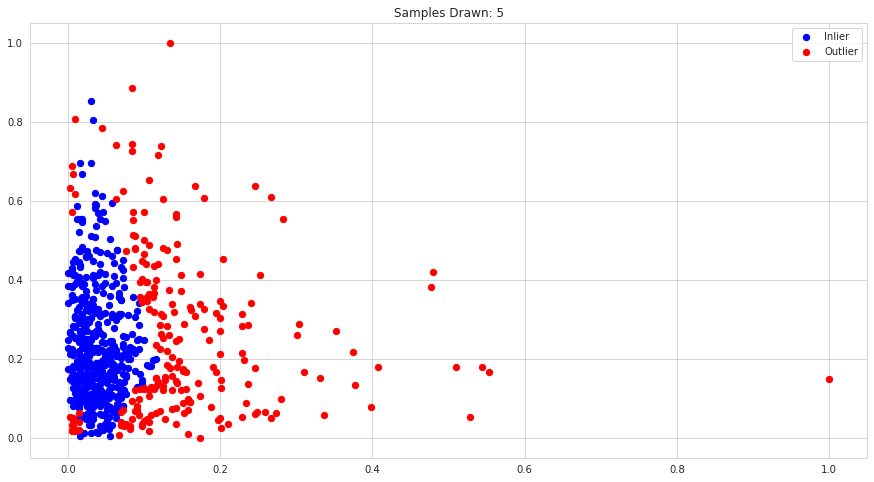

Number of outliers:  291


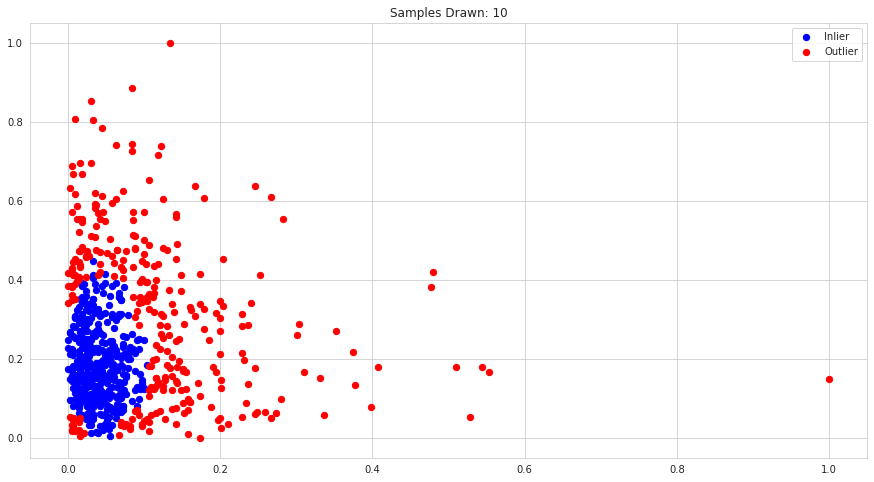

Number of outliers:  253


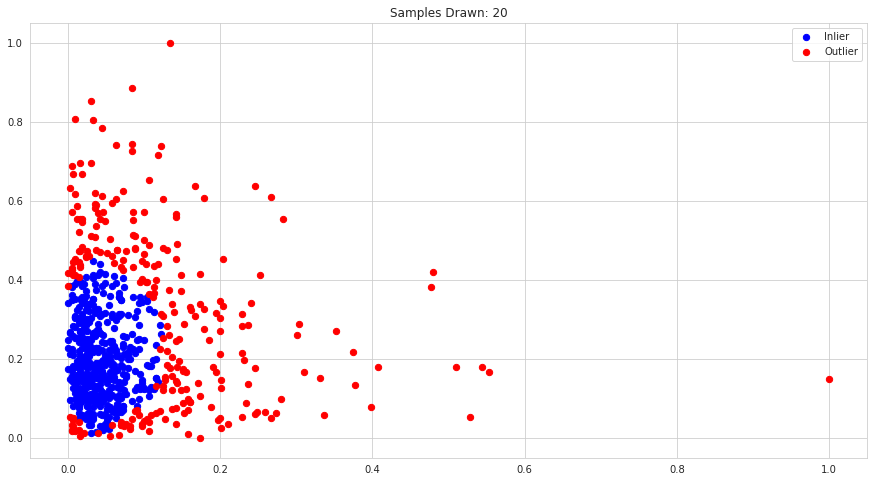

Number of outliers:  241


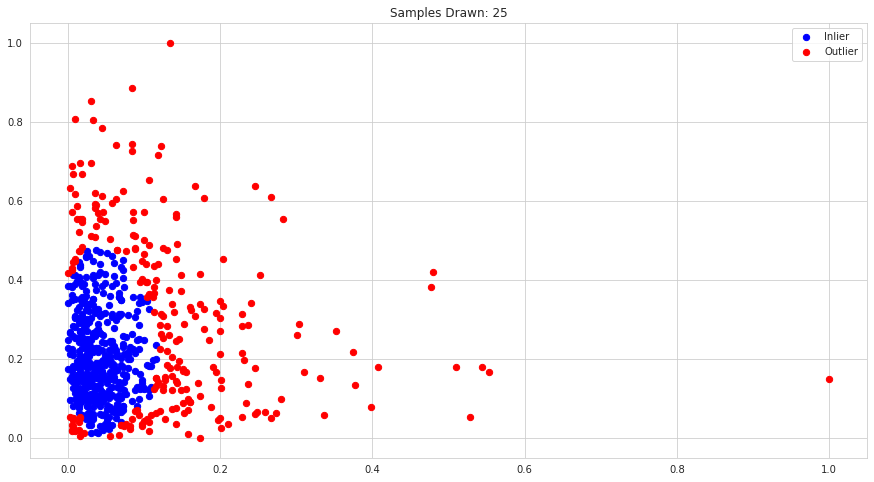

In [0]:
#Write your code here

# Running for different number of samples to be drawn for the isolation forest
selected_features = np.vstack((fitted[:,3],fitted[:,7])).T

no_samples = [5,10,20,25]

for samp in no_samples:

  plt.figure(figsize=(15,8))
  forest = IsolationForest(max_samples=samp)
  forest.fit(selected_features)
  preds =forest.predict(selected_features)
  plt.title("Samples Drawn: " + str(samp))

  inliers  = selected_features[np.where((preds)==1)[0]]
  outliers = selected_features[np.where((preds)==-1)[0]]
  print("Number of outliers: ", len(outliers) )  
  plt.scatter(inliers[:, 0],inliers[:, 1], c='b',s=40 )
  plt.scatter(outliers[:, 0],outliers[:, 1], c='r',s=40 )
  plt.axis('tight')
  plt.legend(["Inlier", "Outlier"])
  plt.show()

* **What value did you use for the 'max_samples'?**
I ran the algorithm multiple times. The different values of max_sample were kept as 5, 10, 20 and 25 just to see the variation and kind of outliers detected by changing this parameter. It seems that for the value of 25, we don't get outliers in areas surround by many points not declared as outliers by our algorithm

* **Compare the results from both LOC and Isolation Forest:** 



* *Comparison:*

The results show that extreme outliers are the same for both, LOC as well as Isolation Forest.

The Isolation forest algorithm us sensitive to global outliers and doesn't detect outliers unlike the local outlier factor

